In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1)	A partir da imagem original obtenha as outras imagens conforme descrição

Desejamos separar linhas de círculos. Uma operação de abertura com um elemento estruturante na forma de círculo (definir o raio) faz essa tarefa.


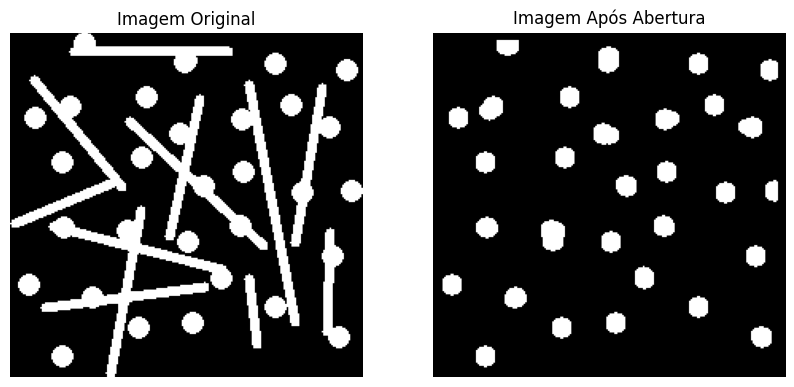

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread("art3.png", cv2.IMREAD_GRAYSCALE)


raio = 5
elemento_estruturante = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (raio*2+1, raio*2+1))


def erosao(imagem, elemento_estruturante):
    altura, largura = imagem.shape
    erodida = np.zeros_like(imagem)

    
    for i in range(raio, altura - raio):
        for j in range(raio, largura - raio):
            regiao = imagem[i-raio:i+raio+1, j-raio:j+raio+1]
            if np.all(regiao[elemento_estruturante == 1] == 255):
                erodida[i, j] = 255
            else:
                erodida[i, j] = 0

    return erodida


def dilatacao(imagem, elemento_estruturante):
    altura, largura = imagem.shape
    dilatada = np.zeros_like(imagem)

   
    for i in range(raio, altura - raio):
        for j in range(raio, largura - raio):
            regiao = imagem[i-raio:i+raio+1, j-raio:j+raio+1]
            if np.any(regiao[elemento_estruturante == 1] == 255):
                dilatada[i, j] = 255
            else:
                dilatada[i, j] = 0

    return dilatada

img_erodida = erosao(img1, elemento_estruturante)
img_aberta_ = dilatacao(img_erodida, elemento_estruturante)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_aberta_, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Após Abertura')
plt.axis('off')

plt.show()

2)

a) Obter linhas verticais. Abertura com elemento estruturante vertical 3x9
b) Obter linhas horizontais. Abertura com elemento estruturante horizontal 9x3. Tente eliminar as linhas erradas usando uma máscara maior


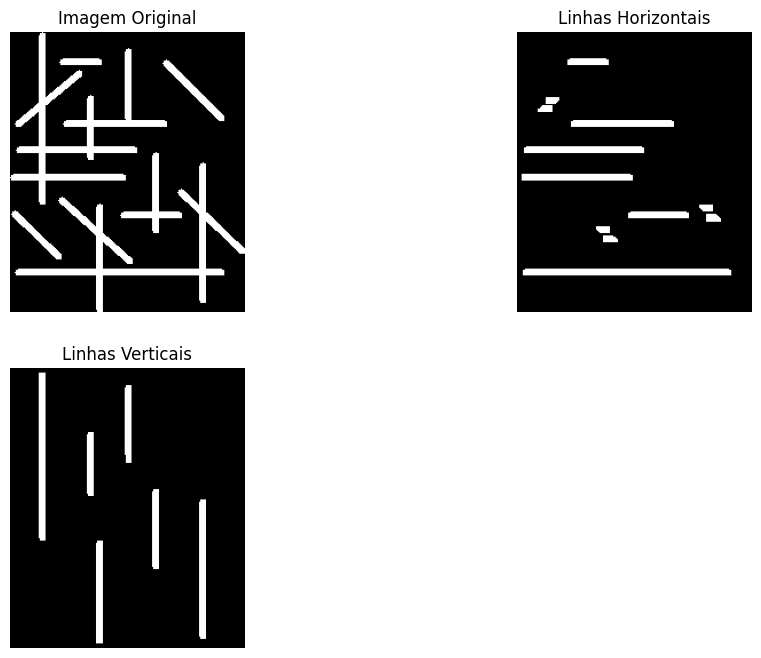

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img2 = cv2.imread("art2.png", cv2.IMREAD_GRAYSCALE)

elemento_estruturante_horizontal = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))  
elemento_estruturante_vertical = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 9))   

def erosao(imagem, elemento_estruturante):
    altura, largura = imagem.shape
    erodida = np.zeros_like(imagem)
    raio_vertical = elemento_estruturante.shape[0] // 2
    raio_horizontal = elemento_estruturante.shape[1] // 2

    for i in range(raio_vertical, altura - raio_vertical):
        for j in range(raio_horizontal, largura - raio_horizontal):
            regiao = imagem[i - raio_vertical:i + raio_vertical + 1, j - raio_horizontal:j + raio_horizontal + 1]
            if np.all(regiao[elemento_estruturante == 1] == 255):
                erodida[i, j] = 255
            else:
                erodida[i, j] = 0

    return erodida

def dilatacao(imagem, elemento_estruturante):
    altura, largura = imagem.shape
    dilatada = np.zeros_like(imagem)
    raio_vertical = elemento_estruturante.shape[0] // 2
    raio_horizontal = elemento_estruturante.shape[1] // 2

    for i in range(raio_vertical, altura - raio_vertical):
        for j in range(raio_horizontal, largura - raio_horizontal):
            regiao = imagem[i - raio_vertical:i + raio_vertical + 1, j - raio_horizontal:j + raio_horizontal + 1]
            if np.any(regiao[elemento_estruturante == 1] == 255):
                dilatada[i, j] = 255
            else:
                dilatada[i, j] = 0

    return dilatada

img_erosao_horizontal = erosao(img2, elemento_estruturante_horizontal)
img_dilatacao_horizontal = dilatacao(img_erosao_horizontal, elemento_estruturante_horizontal)

img_erosao_vertical = erosao(img2, elemento_estruturante_vertical)
img_dilatacao_vertical = dilatacao(img_erosao_vertical, elemento_estruturante_vertical)

# Exibir resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Imagem Original')
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Linhas Horizontais')
plt.imshow(img_dilatacao_horizontal, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Linhas Verticais')
plt.imshow(img_dilatacao_vertical, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

3)

a) Theshold (t=210)

b) Utilizando abertura com elemento circular de 11 pixels para reter as células grandes

c) É possível reter somente os objetos pequenos utilizando a operação abertura?

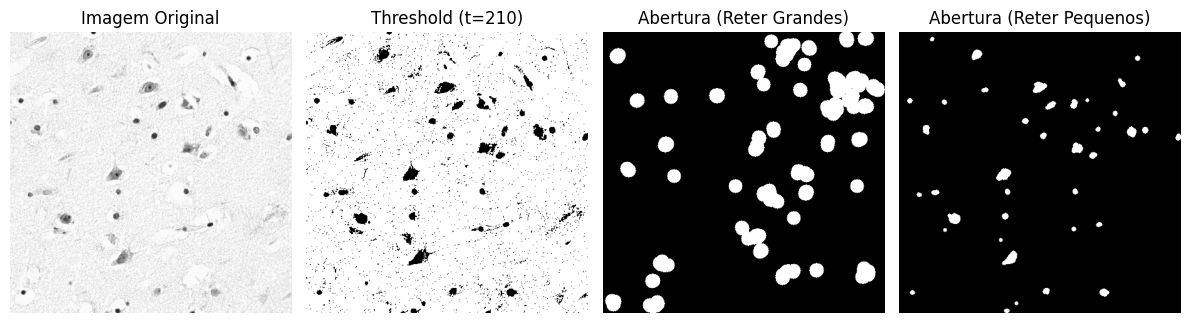

In [12]:
import cv2
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
import matplotlib.pyplot as plt


def circular_structure(radius):
    L = 2 * radius + 1
    struct = np.zeros((L, L), dtype=bool)
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    struct[mask] = True
    return struct


img_gray = cv2.imread("cel4.png", cv2.IMREAD_GRAYSCALE)


threshold_value = 210
img_threshold = (img_gray > threshold_value).astype(np.uint8)


selem_large = circular_structure(11)  
eroded_large = binary_erosion(img_threshold, structure=selem_large)
img_opening_large = binary_dilation(eroded_large, structure=selem_large)


selem_small = circular_structure(3) 
eroded_small = binary_erosion(1 - img_threshold, structure=selem_small)
img_opening_small = binary_dilation(eroded_small, structure=selem_small)

# Exibir as imagens
fig, axes = plt.subplots(1, 4, figsize=(12, 6))
axes[0].imshow(img_gray, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Imagem Original")
axes[0].axis("off")

axes[1].imshow(img_threshold, cmap='gray')
axes[1].set_title("Threshold (t=210)")
axes[1].axis("off")

axes[2].imshow(img_opening_large, cmap='gray')
axes[2].set_title("Abertura (Reter Grandes)")
axes[2].axis("off")

axes[3].imshow(img_opening_small, cmap='gray')
axes[3].set_title("Abertura (Reter Pequenos)")
axes[3].axis("off")

plt.tight_layout()
plt.show()


4)
Utilizando os conceitos já aprendidos na disciplina, faça um código que calcula a quantidade de objetos da imagem abaixo. Pode-se utilizar funções prontas do opencv (não para realizar a contagem em si, mas para realizar os passos necessários)

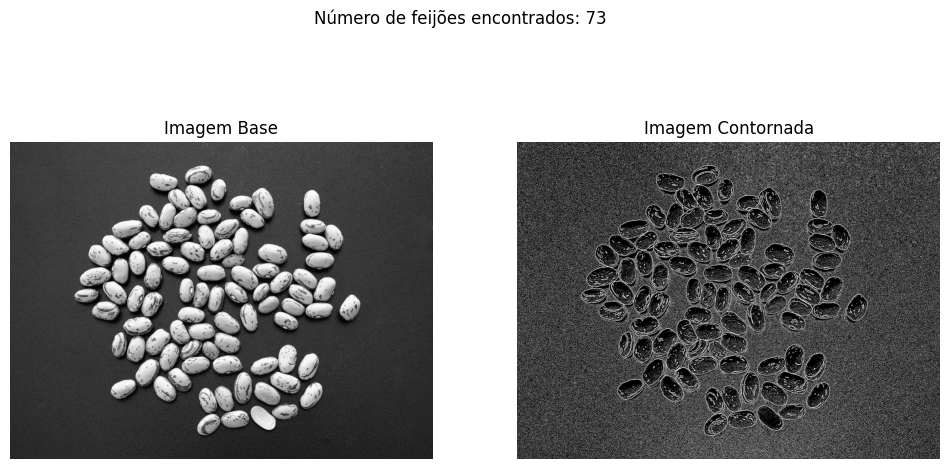

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img4 = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)


blurred = cv2.GaussianBlur(img4, (5, 5), 0)


thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 11, 2)


contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


min_contour_area = 1000  
contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

num_feijao = len(contours)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Imagem Base')
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagem Contornada')
plt.imshow(thresh, cmap='gray')
plt.axis('off')


plt.suptitle(f'Número de feijões encontrados: {num_feijao}')
plt.show()


5.  Utilize a transformada hit or miss para localizar o logotipo da UFU. Escolha um deles

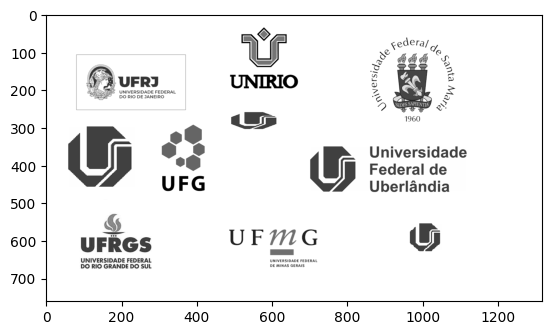

In [32]:
img5 = cv2.imread("logotipos.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img5, cmap='gray', vmin=0, vmax=255);

6. Utilize operadores morfológicos para extração de fronteiras dos feijões. Mostre o resultado junto com a imagem original

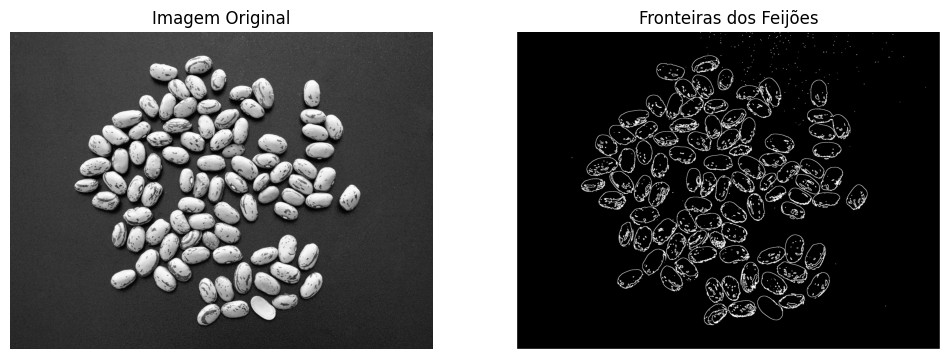

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def dilatacao(image, kernel):
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    dilated_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            dilated_image[i, j] = np.max(region * kernel)

    return dilated_image


def erosao(image, kernel):
    pad_height = kernel.shape[0] // 2
    pad_width = kernel.shape[1] // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    eroded_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            eroded_image[i, j] = np.min(region * kernel)

    return eroded_image

img = cv2.imread("feijao.jpg", cv2.IMREAD_GRAYSCALE)

_, img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

kernel = np.ones((5, 5), np.uint8)
dilated = dilatacao(img_bin, kernel)
eroded = erosao(img_bin, kernel)
borders = dilated - eroded


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Imagem Original')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Fronteiras dos Feijões')
plt.imshow(borders, cmap='gray')
plt.axis('off')

plt.show()
